In [1]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Con2D, Maxpooling2D

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests



In [2]:
!mkdir vac_card_tampering
!mkdir vac_card_tampering/image

In [5]:
# original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
# tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

original = Image.open(requests.get('https://www.mass.gov/files/styles/835x/public/2018-03/REAL%20Adult.png?itok=BT8K-7Tt',stream=True).raw)
tampered = Image.open(requests.get('https://idtop.is/wp-content/uploads/2020/09/massachusetts-fake-id-scaled-e1600608550309.jpg', stream=True).raw)

In [6]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)
# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  JPEG
Original image size :  (530, 340)
Tampered image size :  (2368, 1497)


In [7]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('vac_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('vac_card_tampering/image/tampered.png')#Saves image

(250, 160)
(250, 160)


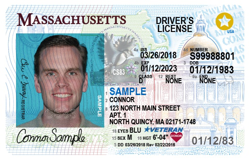

In [8]:
original

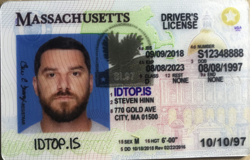

In [9]:
tampered

In [10]:
# load the two input images
original = cv2.imread('vac_card_tampering/image/original.png')
tampered = cv2.imread('vac_card_tampering/image/tampered.png')

In [11]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [12]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM Score is : {}".format(score*100))
if score >= 80:
    print ("The given card is original")
else:
    print("The given card is tampered")

SSIM Score is : 19.918997326565417
The given card is tampered


In [13]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [14]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format Image


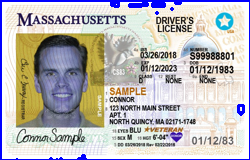

In [15]:
#Display original image with contour
print('Original Format Image')
original_contour = Image.fromarray(original)
original_contour.save("vac_card_tampering/image/original_contour_image.png")
original_contour

Tampered Image


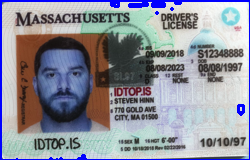

In [16]:
#Diplay tampered image with contour
print('Tampered Image')
tampered_contour = Image.fromarray(tampered)
tampered_contour.save("vac_card_tampering/image/tampered_contours_image.png")
tampered_contour

Different Image


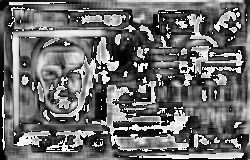

In [17]:
# Display difference image with black

print('Different Image')
difference_image = Image.fromarray(diff)
difference_image.save("vac_card_tampering/image/difference_image.png")
difference_image

Threshold Image


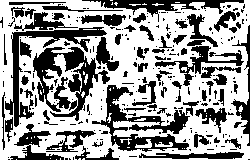

In [18]:
#Display threshold image with white

print('Threshold Image')
threshold_image = Image.fromarray(thresh)
threshold_image.save("vac_card_tampering/image/threshold_image.png")
threshold_image